<a href="https://colab.research.google.com/github/lawsonk16/Object-Detection/blob/main/ResNet_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation

### Part 0 - Imports

In [ ]:
! pip install terminaltables

In [ ]:
import sys
paths = ['/content/drive/MyDrive/Colab Notebooks/scripts']

for p in paths:
    sys.path.append(p)

import os
import json
import shutil

from coco_utils.pytorch_coco_detect import *
from ensemble import *
from coco_utils.coco_help import *

### Part 1 - Loading Data

In [ ]:
data_zip_path = '/content/drive/MyDrive/Colab Notebooks/Clean Datasets/FAIR1M/500/FAIR1M_500_50-20-30.zip'
data_path = '/content/'

# shutil.copy2(data_zip_path, data_path)

# shutil.unpack_archive(data_zip_path.split('/')[-1])
# os.remove(data_zip_path.split('/')[-1])

In [ ]:
# change the data tag to match your dataset, if applicable
data_tag = 'FAIR1M_500'

train_ims = 'train_images/'
val_ims = 'val_images/'
test_ims = 'test_images/'

train_anns = f'train_{data_tag}_gt.json'
val_anns = f'val_{data_tag}_gt.json'
test_anns = f'test_{data_tag}_gt.json'

### Part 2 - Preparing For Evaluation

In [ ]:
num_workers = 0
train_batch_size = 8
train_data_loader = make_train_loader(train_ims, train_anns, train_batch_size, num_workers)

num_workers = 0
val_batch_size = 1
val_data_loader = make_test_loader(val_ims, val_anns, val_batch_size, num_workers)

loading annotations into memory...
Done (t=2.11s)
creating index...
index created!
loading annotations into memory...
Done (t=2.06s)
creating index...
index created!


In [ ]:
# Check the number of catgeories
with open(train_anns, 'r') as f:
    gt = json.load(f)

cats = gt['categories']

In [ ]:
### Modify these variables for your experiemnt ###
exp_folder = '/content/drive/MyDrive/Colab Notebooks/Experiments/Detection/'
data_name = 'FAIR1M'
data_split = 'Train-50_Val-20_Test-30'

resnet_backbone = 50
num_classes = len(cats) + 1

optim = 'SGD'
lr = 0.0001
mom = 0.9
wd = 0.0005
pretrained = True

model_path = name_model(exp_folder, data_name, data_split, resnet_backbone, train_batch_size, num_classes, optim, lr, mom, wd, pretrained)

# get the model
model = get_fasterrcnn(num_classes, pretrained, resnet_backbone)
model = load_model(model, model_path)

### Part 3 - Producing Detections

In [ ]:
iou_nms = 0.9

# train_dts
train_dt_path = detector_dts(model, model_path, train_data_loader, iou_nms, 'train')

# val dts
val_dt_path = detector_dts(model, model_path, val_data_loader, iou_nms, 'val')

Detections already produced
Detections already produced


### Part 4 - Evaluating Detections

In [ ]:
train_dt_path, val_dt_path

('/content/drive/MyDrive/Colab Notebooks/Experiments/Detection/FAIR1M/Train-50_Val-20_Test-30/resnet50fpn/classes_38_optim_SGD_lr_0p0001_mom_0p9_wd_0p0005_pretrained_True_batch_8/detections/train_26_epochs_0p9_iou-nms.json',
 '/content/drive/MyDrive/Colab Notebooks/Experiments/Detection/FAIR1M/Train-50_Val-20_Test-30/resnet50fpn/classes_38_optim_SGD_lr_0p0001_mom_0p9_wd_0p0005_pretrained_True_batch_8/detections/val_26_epochs_0p9_iou-nms.json')

In [ ]:
conf_thresh = 0.0

# Detections
train_dts = yolo_coco_dts(train_anns, train_dt_path, conf_thresh)
val_dts = yolo_coco_dts(val_anns, val_dt_path, conf_thresh)

# Ground Truth
train_gt = yolo_coco_gt(train_anns)
val_gt = yolo_coco_gt(val_anns)

100%|██████████| 6153/6153 [01:03<00:00, 97.26it/s]


In [ ]:
import json
with open(train_anns, 'r') as f:
    train_data = json.load(f)
clss = train_data['categories']

class_names = []

for c in clss:
    class_names.append(c['name'])

In [ ]:
iou_thresh = 0.2

print('Train')
evaluate_coco(val_dts, val_gt, class_names, iou_thresh)

Train


Computing AP: 100%|██████████| 37/37 [00:00<00:00, 55.91it/s]

+-------+-------------------+---------+
| Index | Class name        | AP      |
+-------+-------------------+---------+
| 0     | Dry Cargo Ship    | 0.00001 |
| 1     | Engineering Ship  | 0.00001 |
| 2     | Motorboat         | 0.00000 |
| 3     | Liquid Cargo Ship | 0.00000 |
| 4     | Warship           | 0.00000 |
| 5     | Passenger Ship    | 0.00000 |
| 6     | Tugboat           | 0.00000 |
| 7     | Fishing Boat      | 0.00000 |
| 8     | other-ship        | 0.00000 |
| 9     | Small Car         | 0.00001 |
| 10    | Van               | 0.00003 |
| 11    | Bus               | 0.00000 |
| 12    | Excavator         | 0.00000 |
| 13    | Tractor           | 0.00000 |
| 14    | Dump Truck        | 0.00001 |
| 15    | Cargo Truck       | 0.00000 |
| 16    | Truck Tractor     | 0.00000 |
| 17    | Trailer           | 0.00000 |
| 18    | other-vehicle     | 0.00000 |
| 19    | Boeing737         | 0.00000 |
| 20    | Boeing747         | 0.00000 |
| 21    | Boeing777         | 0.00000 |


In [ ]:
class_names = load_classes('/content/drive/MyDrive/Colab Notebooks/RESNETS_ENSEMBLE/classes.names')

### Part 5 - Visualizing Performance

<Figure size 432x288 with 0 Axes>

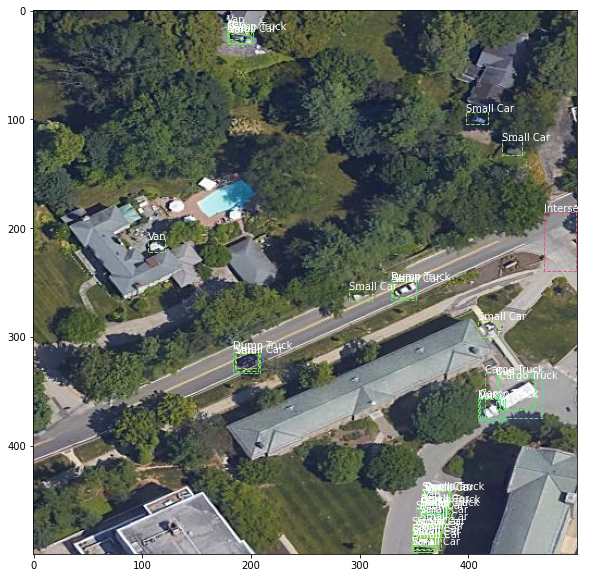

<Figure size 432x288 with 0 Axes>

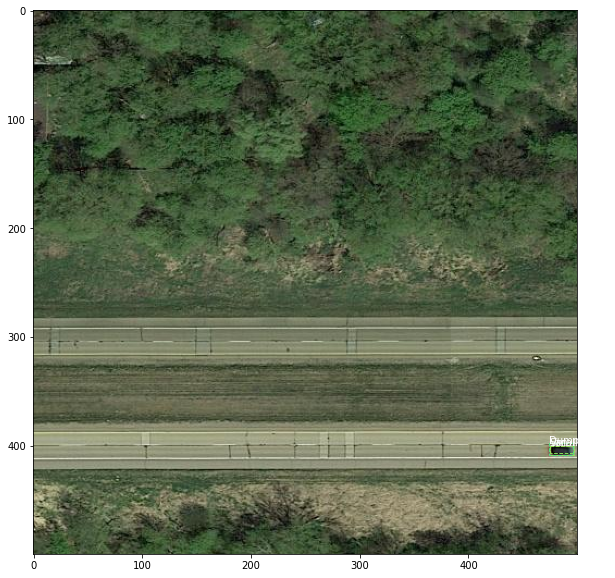

<Figure size 432x288 with 0 Axes>

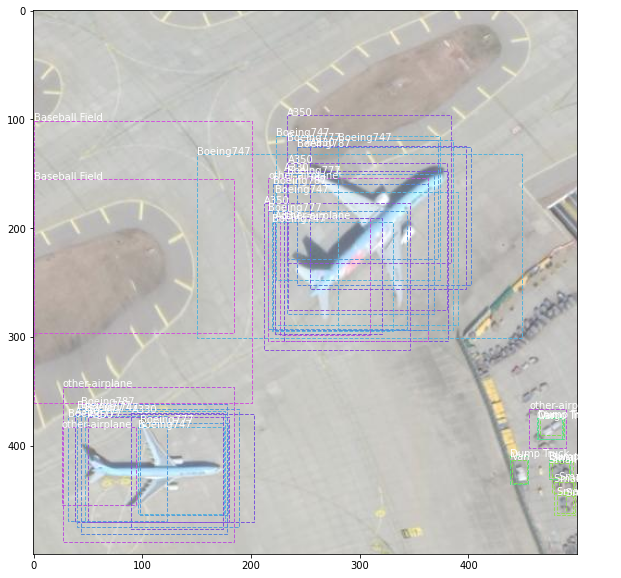

<Figure size 432x288 with 0 Axes>

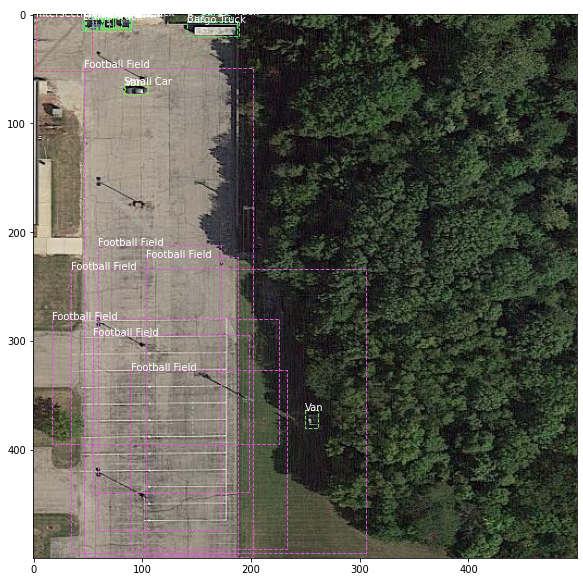

<Figure size 432x288 with 0 Axes>

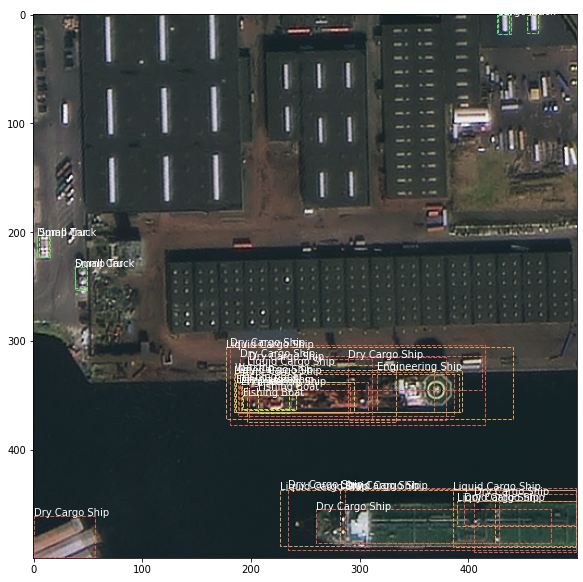

<Figure size 432x288 with 0 Axes>

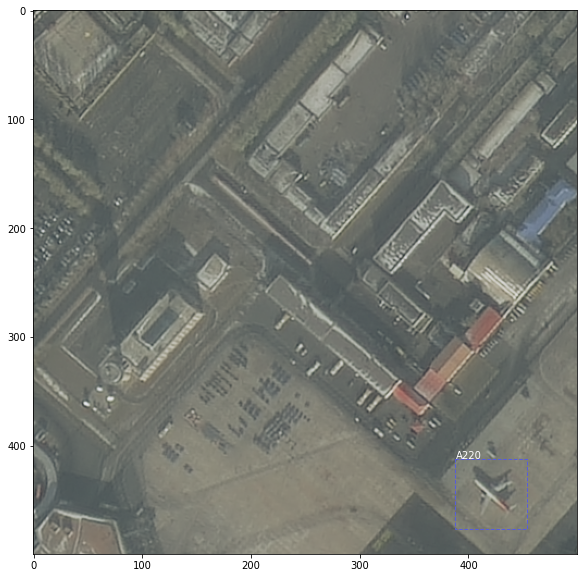

<Figure size 432x288 with 0 Axes>

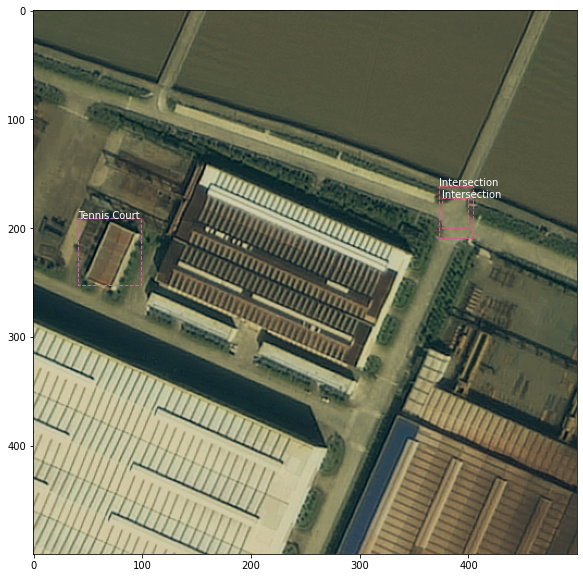

<Figure size 432x288 with 0 Axes>

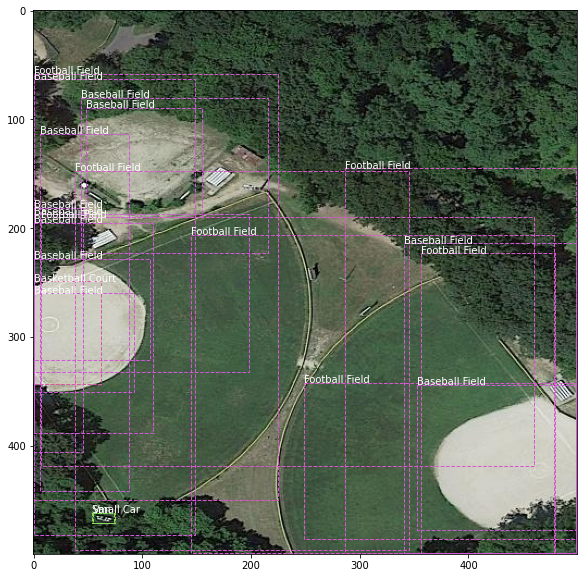

<Figure size 432x288 with 0 Axes>

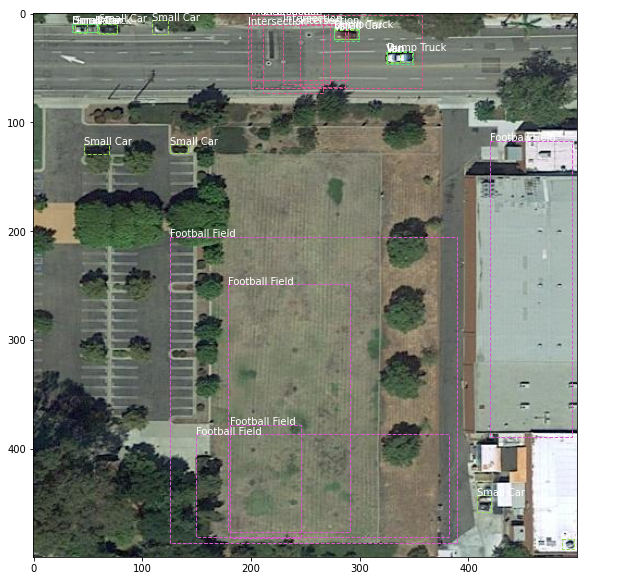

<Figure size 432x288 with 0 Axes>

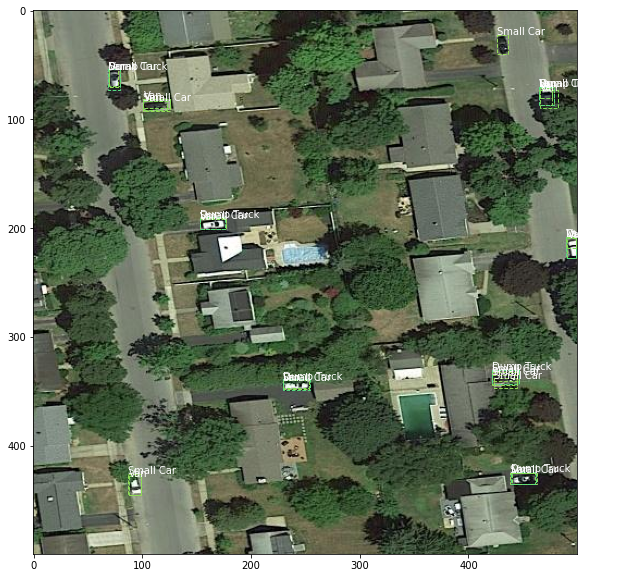

In [ ]:
train_anns = f'train_{data_tag}_gt.json'
# display_random_ims(3, train_anns, train_ims, (5,5))
# display_random_gt_dt(3, train_anns, train_dt_path, train_ims, (10,10))
display_random_dt(10, val_anns, val_dt_path, val_ims, (10,10), 0.0)